In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline

# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootTP2="/home/johann/Remote2"
rootMAC="/Users/jh"
root=rootMAC

# TODO re-run this below, with n=5 and more data points p=1.1 and 1.4

In [10]:
# get polymer system data for different n with noLub
def getdatans(a,ns,trigger='',system=''):
    datans=[]
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    for n in ns:
        b=10*n
        folder=initfolder
        data=[]
        if n==1: 
            folder+="/"+trigger
        else: 
            if system=='':
                folder+="/test"
            folder+="/n"+str(n)+"/"+trigger
        folder+="/dt0.001/t200/"+adir+"/d0/b"+str(b)
        for pdir in os.listdir(folder): 
            p=float(pdir[1:])/10
            file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
            #print(file)
            if os.path.isfile(file):
                #print(file)
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            else: print("Error: File not found!\n"+str(file))
        datans.append((np.array(sorted(data))))
    return datans

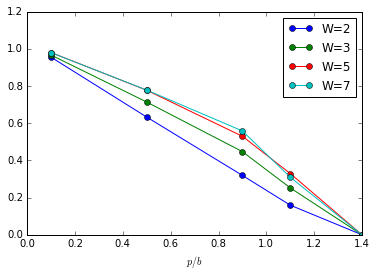

In [24]:
ns=[2,3,5,7]
a=0.5
datans = getdatans(a,ns,system='test/EwaldTest1',trigger='noLub/steric')
for i,n in enumerate(ns):
    data=datans[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label='W='+str(n))
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.show()

### Conclusion:
This is really strange. It looks completely different than figure 4 with $a=0.1b$ in the report HIforBD, where only a very small effect was visible. Here, on the other hand, a very large effect is visible.

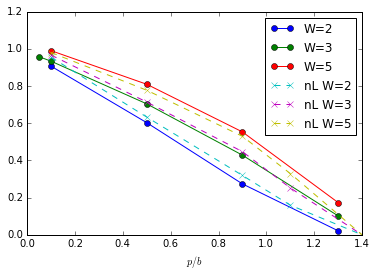

In [25]:
ns=[2,3,5]
a=0.5
datans = getdatans(a,ns,system='test/Ewaldtest1')
datansnL = getdatans(a,ns,system='test/EwaldTest1',trigger='noLub/steric')
for i,n in enumerate(ns):
    data=datans[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label='W='+str(n))
for i,n in enumerate(ns):
    data=datansnL[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'x--',label='nL W='+str(n))
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.show()

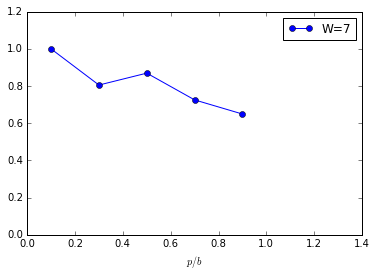

In [27]:
ns=[7]
a=0.5
datans = getdatans(a,ns,system='test/noEwald/EwaldTest1',trigger='noLub/steric')
for i,n in enumerate(ns):
    data=datans[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label='W='+str(n))
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.xlim([0,1.4])
plt.show()

#### Conclusion:
It seems as thoug lubrication increases the diffusivity for large W=5. This should not happen. A bug in my code? I dont know...

# TODO: with lubrication
- test the system size effect in combination with lubrication!
- also, add extra W=7 data with p=11, 14


## compare with similar ranSpheres data to gauge the effect of the geometry

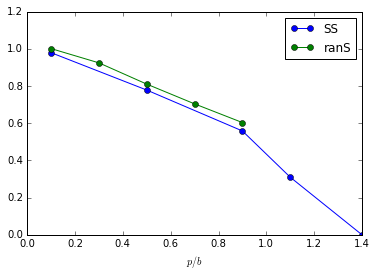

In [17]:
ns=[7]
a=0.5
datans = getdatans(a,ns,system='test/EwaldTest1',trigger='noLub/steric') + getdatans(a,ns,system='ranSpheres/test/EwaldTest1',trigger='noLub/steric')
labels=['SS','ranS']
for i,data in enumerate(datans):
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label=labels[i])
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.show()

#### Conclusion:
Geometry seems to play a minor role when long-range HI are included. Nonetheless, I do get higher diffusivities for the unordered system. This is another indicator, why I get lower diffusivities than Phillips2000.

# TODO 
- compare EwaldTest1/n7/noLub data with similar **noEwald** data to gauge the effect of Ewald summation

- do a similar evaluation as above, but with the normal cubic lattige polymer gel model. Running on yoshi with noLub a=1, and n=2,3,5

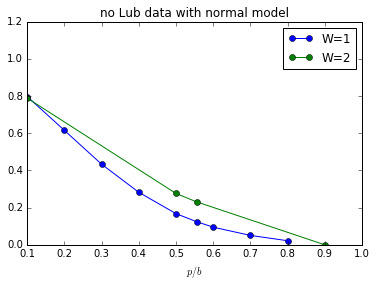

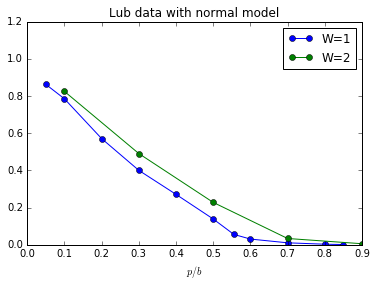

In [35]:
ns=[1,2]
a=1
#NoLub
datans = getdatans(a,ns,system='',trigger='noLub/steric')
for i,n in enumerate(ns):
    data=datans[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label='W='+str(n))
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.title('no Lub data with normal model')
plt.show()

#with Lub
datans = getdatans(a,ns,system='',trigger='')
for i,n in enumerate(ns):
    data=datans[i]
    dd0s=data[:,1]/6.
    prels=data[:,0]
    plt.plot(prels,dd0s,'o-',label='W='+str(n))
plt.legend()
plt.xlabel("$p/b$")
plt.ylim([0,1.2])
plt.title('Lub data with normal model')
plt.show()

### Conclusion:
The effect is weaker than for the single monomer system, but still substantial. For the W=3 system the trajectories are actually too short to give a good indication.